# Quesiton 1

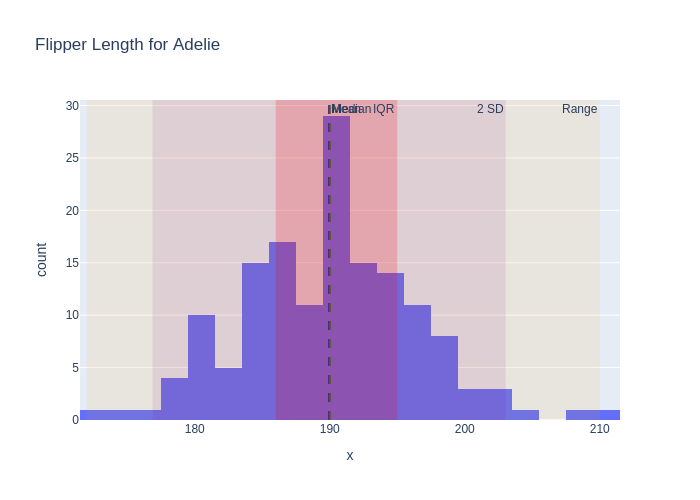

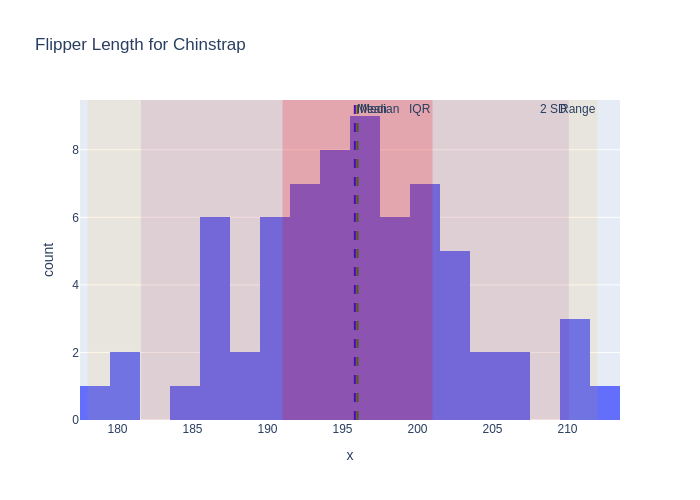

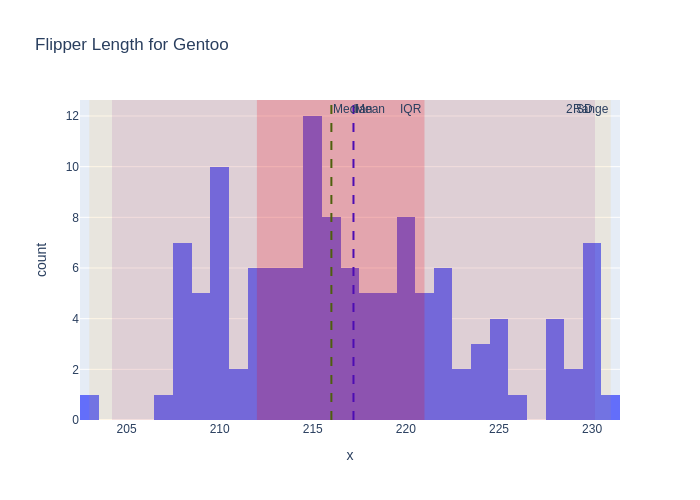

In [15]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Remove missing values in flipper_length_mm and drop rows with NaN values
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Function to create histogram with vertical lines and rectangles for each species
def plot_penguin_histogram(df, species_name):
    species_data = df[df['species'] == species_name]['flipper_length_mm']
    
    # Calculate statistics
    mean_val = species_data.mean()
    median_val = species_data.median()
    min_val = species_data.min()
    max_val = species_data.max()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    std_val = species_data.std()

    # Create the histogram
    fig = px.histogram(species_data, x=species_data, nbins=30, title=f'Flipper Length for {species_name}')
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean_val, line_width=2, line_dash="dash", line_color="blue", annotation_text="Mean")
    fig.add_vline(x=median_val, line_width=2, line_dash="dash", line_color="green", annotation_text="Median")
    
    # Add rectangles for range, interquartile range, and 2 std deviations from mean
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="orange", opacity=0.1, annotation_text="Range", line_width=0)
    fig.add_vrect(x0=q1, x1=q3, fillcolor="red", opacity=0.2, annotation_text="IQR", line_width=0)
    fig.add_vrect(x0=mean_val - 2 * std_val, x1=mean_val + 2 * std_val, fillcolor="purple", opacity=0.1, annotation_text="2 SD", line_width=0)

    fig.show(renderer="png")

# Plot histograms for each species
for species in penguins['species'].unique():
    plot_penguin_histogram(penguins, species)

In [ ]:
# Question 2

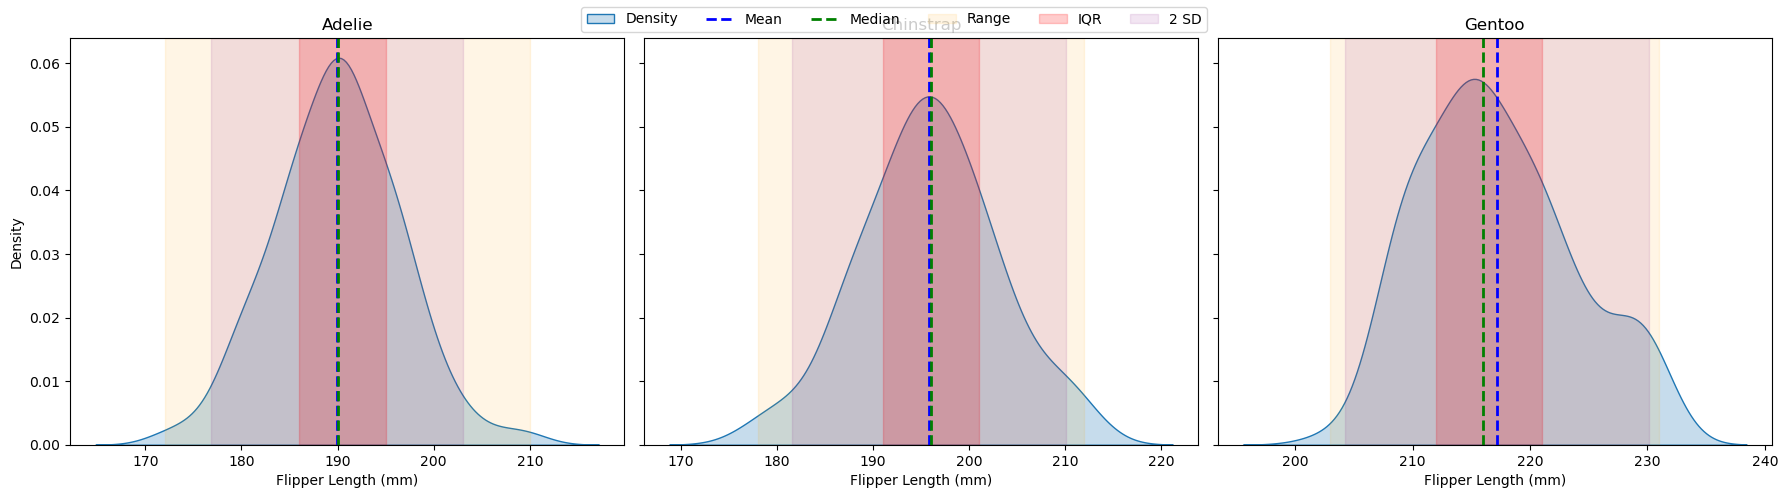

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Remove missing values in flipper_length_mm and drop rows with NaN values
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Function to plot KDE with statistics for each species
def plot_penguin_kde(ax, df, species_name):
    species_data = df[df['species'] == species_name]['flipper_length_mm']
    
    # Calculate statistics
    mean_val = species_data.mean()
    median_val = species_data.median()
    min_val = species_data.min()
    max_val = species_data.max()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    std_val = species_data.std()
    
    # Plot the KDE
    sns.kdeplot(species_data, ax=ax, fill=True, label='Density')
    
    # Add vertical lines for mean and median
    ax.axvline(mean_val, color='blue', linestyle='--', label='Mean', linewidth=2)
    ax.axvline(median_val, color='green', linestyle='--', label='Median', linewidth=2)
    
    # Add rectangles for range, IQR, and 2 SD
    ax.axvspan(min_val, max_val, color='orange', alpha=0.1, label='Range')
    ax.axvspan(q1, q3, color='red', alpha=0.2, label='IQR')
    ax.axvspan(mean_val - 2 * std_val, mean_val + 2 * std_val, color='purple', alpha=0.1, label='2 SD')
    
    ax.set_title(f'{species_name}')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')

# Get the unique species
species_list = penguins['species'].unique()

# Create a grid of subplots (row of three plots)
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot each species in the grid
for i, species in enumerate(species_list):
    plot_penguin_kde(axes[i], penguins, species)

# Adjust layout and add legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=6)

plt.tight_layout()
plt.show()


# Question 3 box plots, histograms, and kernel density estimators(KDE)

### Box Plots:
    Pros: Simple visualization of summary statistics
    Outlier identification
    cons:Limited detail(They don't show the distribution shape)
### Histograms:
    pros:show the overall shape of the distribution
    cons:Not suitable for small datasets
### KDE
    pros:Smooth distribution visualization,Good for continuous data
    cons: Less intuitive for non-statistical audiences, Bandwidth selection sensitivity
### My preference
    KDE would be my preference since it provides the most easiest display of data distribution that box plots cannot and way more smoother than histograms, however situation always will depend on which you want to use.

# Question 4

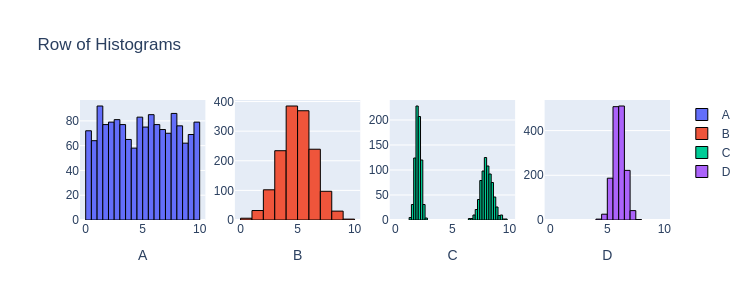

In [12]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [8]:
means = {
    'data1': np.mean(data1),
    'data2': np.mean(data2),
    'data3': np.mean(data3),
    'data4': np.mean(data4)
}

variances = {
    'data1': np.var(data1),
    'data2': np.var(data2),
    'data3': np.var(data3),
    'data4': np.var(data4)
}

means, variances


({'data1': 5.031095836719434,
  'data2': 5.000478798413945,
  'data3': 5.003737291893898,
  'data4': 5.974683241463829},
 {'data1': 8.527579968437253,
  'data2': 2.326983904126251,
  'data3': 9.19155724838829,
  'data4': 0.24675010469975853})

## 4.1 Which datasets have similar means and similar variances
dataset a and c have similar means and similarvariances
## 4.2 Which datasets have similar means but quite different variances
a,b, and c but b has a much lower variance
## 4.3 Datasets with similar variances but quite different means
b and d have a similar variance (not really) and a much different variance, however none of the datasets really meet this requirement
## 4.4 Datasets with quite different means and quite different variances
d compared to all the others has quite different mean and different variance


# Question 5
### Skewness:  
skewness means the asymmetry of the probability distribution of the dataset

### Mean vs median: 
the mean is the average of the data points. the median is the middle value when the data is ordered

### Right skew: 
it means the mean is greater than the median because the large values in the data pull the tail to the right

### left skew: 
means the exact opposite of right skew

### What Causes this?: 
outliers can shift the mean to be more than the median 


# Question 6 visualizing dataset "bees"



Index(['Year', 'Season', 'State', 'Total Annual Loss', 'Beekeepers',
       'Beekeepers Exclusive to State', 'Colonies',
       'Colonies Exclusive to State'],
      dtype='object')
      Year  Season    State Total Annual Loss  Beekeepers  \
0  2010/11  Annual  Alabama            13.90%          21   
1  2011/12  Annual  Alabama            27.00%          25   
2  2012/13  Annual  Alabama            55.10%          36   
3  2013/14  Annual  Alabama            44.30%          33   
4  2014/15  Annual  Alabama            48.00%          28   

  Beekeepers Exclusive to State  Colonies Colonies Exclusive to State  
0                        90.50%       459                      96.10%  
1                        96.00%       582                      99.70%  
2                        94.40%       777                      63.70%  
3                        93.90%      1083                      38.60%  
4                        96.40%       504                      98.50%  


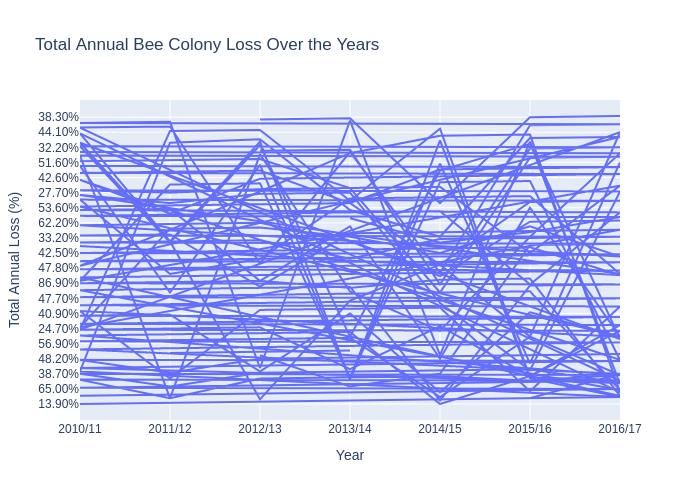

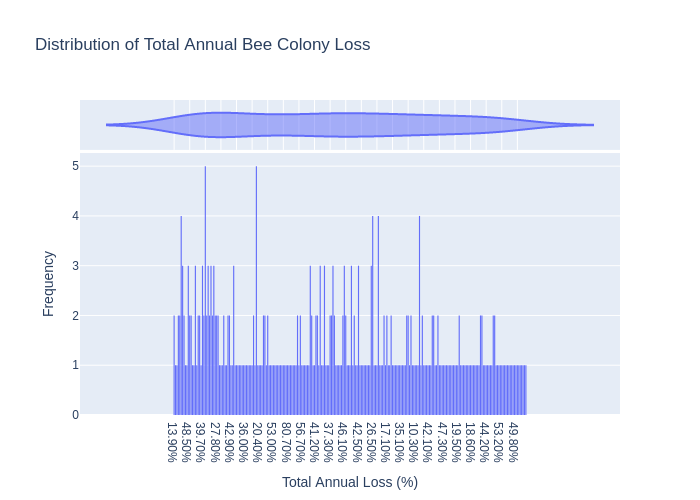

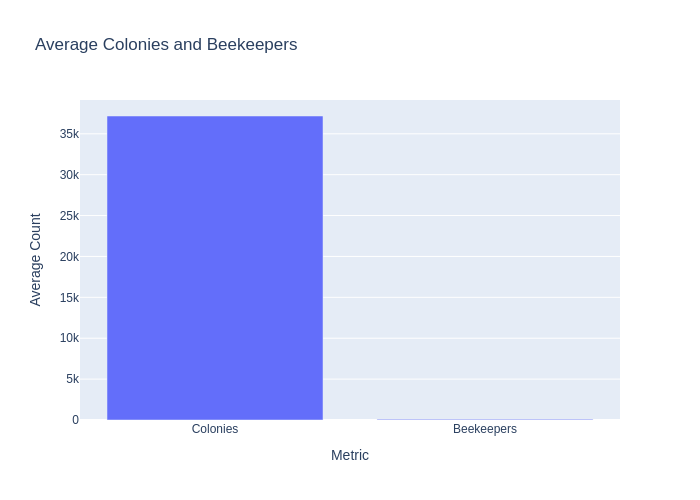

In [29]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# Set the renderer for Plotly
pio.renderers.default = 'notebook'  # or 'browser' for script

# Load the dataset from the URL
url = "https://gist.githubusercontent.com/bootshine2/ba15d3cb38e2ed31129aeca403405a12/raw/10949901cd8a6a75aa46c86b804c42ff410f929e/Bee%2520Colony%2520Loss.csv"
bee_colony_loss = pd.read_csv(url)

# Strip leading/trailing spaces from column names
bee_colony_loss.columns = bee_colony_loss.columns.str.strip()

# Check the actual column names in the dataset
print(bee_colony_loss.columns)

# Ensure that the correct columns exist, and fix any naming issues
print(bee_colony_loss.head())  # Check the data

# Line plot for total annual loss over the years
fig1 = px.line(bee_colony_loss, x='Year', y='Total Annual Loss', title='Total Annual Bee Colony Loss Over the Years')
fig1.update_layout(xaxis_title='Year', yaxis_title='Total Annual Loss (%)')
fig1.show(renderer="png")

# Histogram to show the distribution of total annual loss over the years
fig2 = px.histogram(bee_colony_loss, x='Total Annual Loss', nbins=10, title='Distribution of Total Annual Bee Colony Loss', marginal='violin')
fig2.update_layout(xaxis_title='Total Annual Loss (%)', yaxis_title='Frequency')
fig2.show(renderer="png")

# Bar plot for other metrics - let's use 'Colonies' and 'Beekeepers' for comparison
average_metrics = bee_colony_loss[['Colonies', 'Beekeepers']].mean()

fig3 = px.bar(x=['Colonies', 'Beekeepers'], y=average_metrics, title='Average Colonies and Beekeepers')
fig3.update_layout(xaxis_title='Metric', yaxis_title='Average Count')
fig3.show(renderer="png")


# Question 7 


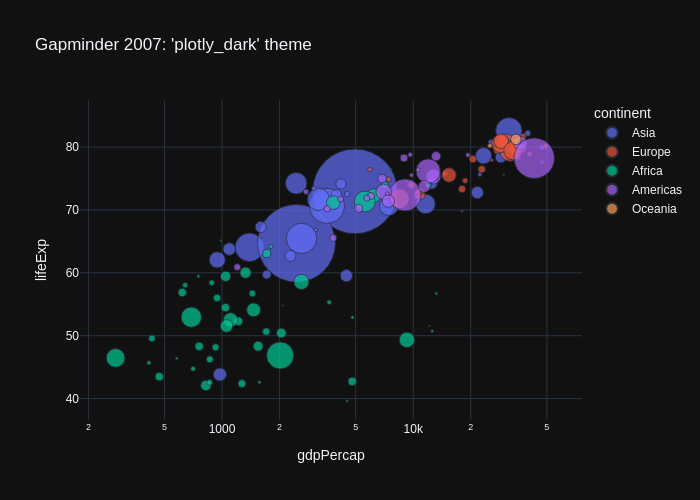

In [32]:
import plotly.express as px

df = px.data.gapminder()
df_2007 = df.query("year==2007")

for template in [ "plotly_dark"]:
    fig = px.scatter(df_2007,
                     x="gdpPercap", y="lifeExp", size="pop", color="continent",
                     log_x=True, size_max=60,
                     template=template, title="Gapminder 2007: '%s' theme" % template)
    fig.show(renderer="png")

# Question 8  second version of the figure from the previous problem 




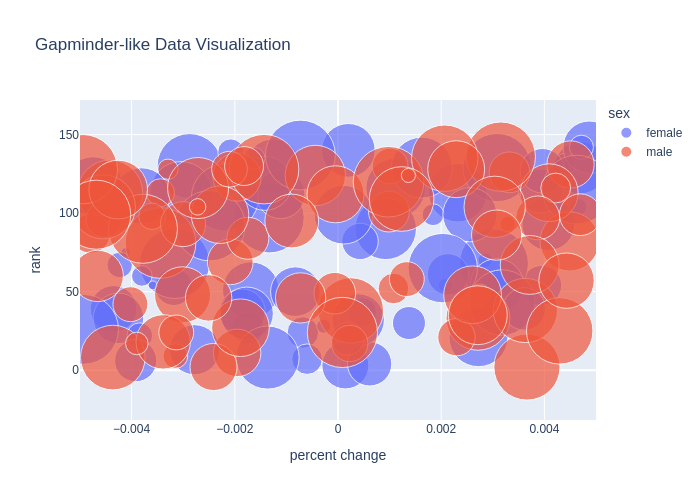

In [34]:
import plotly.express as px

# Load the Gapminder dataset
df = px.data.gapminder()

# Create a modified DataFrame for demonstration, assuming you have the relevant columns
# For demonstration purposes, let's create some dummy data that includes the new columns
# This part should be adapted based on the actual dataset you are working with

# Create a hypothetical DataFrame similar to Gapminder with the required columns
import numpy as np
import pandas as pd

np.random.seed(42)  # For reproducibility

# Generate dummy data
countries = df['country'].unique()
years = [2007]  # Only using year 2007 for this example
data = {
    "name": countries,
    "percent change": np.random.uniform(-0.005, 0.005, size=len(countries)),  # Random percent change
    "rank": np.random.randint(1, len(countries) + 1, size=len(countries)),  # Random rank
    "percent": np.random.uniform(0, 100, size=len(countries)),  # Random percent
    "sex": np.random.choice(['male', 'female'], size=len(countries)),  # Random sex assignment
    "year": years * len(countries)  # Repeat the year for all countries
}

df_modified = pd.DataFrame(data)

# Now, create the scatter plot with the new specifications
fig = px.scatter(df_modified,
                 x="percent change", 
                 y="rank", 
                 size="percent", 
                 color="sex", 
                 animation_frame="year", 
                 animation_group="name", 
                 hover_name="name",
                 size_max=50,
                 range_x=[-0.005, 0.005],
                 title="Gapminder-like Data Visualization")

fig.show(renderer="png")

# Question 9

Yes


# CHATBOT LINK1:https://chatgpt.com/share/66f608ab-67a8-8003-ba45-3a858d755c49
# CHATBOT LINK2: https://chatgpt.com/share/66f6087e-9db8-8003-9944-26d162c17045